# Descrição

O dataset utilizado para análise foi retirado da plataforma [*Kaggle*](https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset/). 

>This synthetic dataset was crafted to reflect real-world patterns and includes high-anxiety cases to support research in detection and intervention.

Para analisar os dados, optou-se por atacar o problema como um desafio de classificação, onde a label de uma dada instância é o correspondente nível de ansiedade.

# Leitura e análise inicial do dataset

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('data/data.csv')
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [56]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [57]:
# Verifica a quantidade de valores nulos (vazios) em cada coluna
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [58]:
# Analisa colunas categoricas
categorical_columns = df.select_dtypes(include=['object', 'str']).columns
for col in categorical_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts())
    print('\n')

Coluna: Gender
Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64


Coluna: Occupation
Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64


Coluna: Smoking
Smoking
Yes    5779
No     5221
Name: count, dtype: int64


Coluna: Family History of Anxiety
Family History of Anxiety
Yes    5847
No     5153
Name: count, dtype: int64


Coluna: Dizziness
Dizziness
Yes    5672
No     5328
Name: count, dtype: int64


Coluna: Medication
Medication
Yes    5666
No     5334
Name: count, dtype: int64


Coluna: Recent Major Life Event
Recent Major Life Event
Yes    5623
No     5377
Name: count, dtype: int64




A partir das demonstrações acima, é possível perceber que os dados são balanceados e não nulos (algo esperado de um dataset sintético).

# Criando labels

Para auxiliar as análises decidiu-se criar 4 níveis de labels:
1. Pouco ansioso (0), muito ansioso (1)
   1. Pouco ansioso = níveis 1 e 2
   2. Muito ansioso = níveis 9 e 10
2. Pouco/médio ansioso (0), médio/muito ansioso (1)
   1. Pouco/médio ansioso = níveis menores ou iguais a 5
   2. Médio/muito ansioso = níveis maiores que 5
3. Pouco ansioso (0), ansiedade moderada (1), muito ansioso (2)
   1. Pouco = níveis 1 e 2
   2. Moderada = níveis 4 a 6
   3. Muito  = níveis 9 e 10
4. Categorias originais

In [59]:
df_level_1 = df.loc[(df['Anxiety Level (1-10)'] <= 2) | (df['Anxiety Level (1-10)'] >= 9)]
df_level_1['label'] = df_level_1['Anxiety Level (1-10)'].apply(lambda x: 0 if x <= 2 else 1)
df_level_1.drop(columns=['Anxiety Level (1-10)'], inplace=True)
df_level_1.to_csv('data/data_level_1.csv', index=False)
df_level_1.shape

(3446, 19)

In [60]:
df_level_2 = df.copy()
df_level_2['label'] = df_level_2['Anxiety Level (1-10)'].apply(lambda x: 0 if x <= 5 else 1)
df_level_2.drop(columns=['Anxiety Level (1-10)'], inplace=True)
df_level_2.to_csv('data/data_level_2.csv', index=False)
df_level_2.shape

(11000, 19)

In [61]:
df_level_3 = df.copy()

def map_anxiety_level(x):
    if x <= 2:
        return 0
    elif x >= 4 and x <= 6:
        return 1
    elif x >= 9:
        return 2

df_level_3['label'] = df_level_3['Anxiety Level (1-10)'].apply(map_anxiety_level)
df_level_3 = df_level_3[df_level_3['label'].notnull()]
df_level_3.drop(columns=['Anxiety Level (1-10)'], inplace=True)
df_level_3.to_csv('data/data_level_3.csv', index=False)
df_level_3.shape

(8107, 19)

In [62]:
df_level_4 = df.copy()
df_level_4.rename(columns={'Anxiety Level (1-10)': 'label'}, inplace=True)
df_level_4.to_csv('data/data_level_4.csv', index=False)
df_level_4.shape

(11000, 19)

# Análise das features

Para fazer uma análise da importância das features, optou-se por utilizar o dataset cujas labels identificam extremos: `data_level_1.csv`, onde a label 1 corresponde aos níveis 9 e 10 de ansiedade e a label 0, aos níveis 1 e 2.

In [63]:
df = pd.read_csv('data/data_level_1.csv')

In [64]:
# Colunas cujos valores não possuem um range/valores especificado ou que possuem muitos valores únicos
not_specified_range_columns = [
    'Age',
    'Sleep Hours',
    'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)',
    'Alcohol Consumption (drinks/week)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)'
]

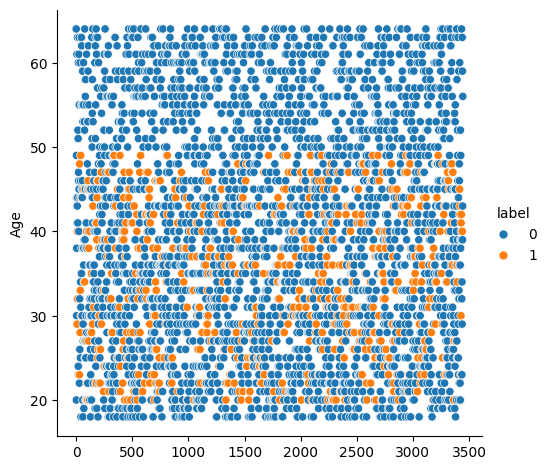

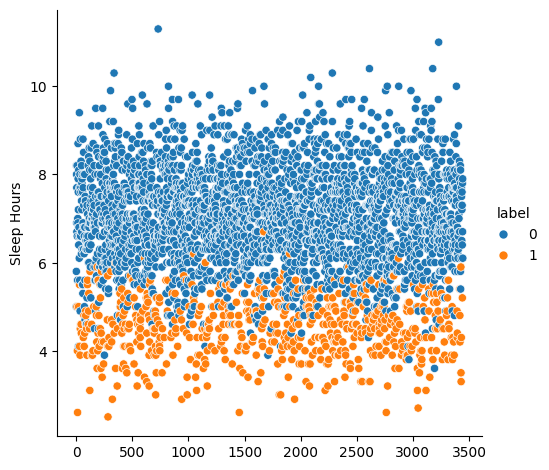

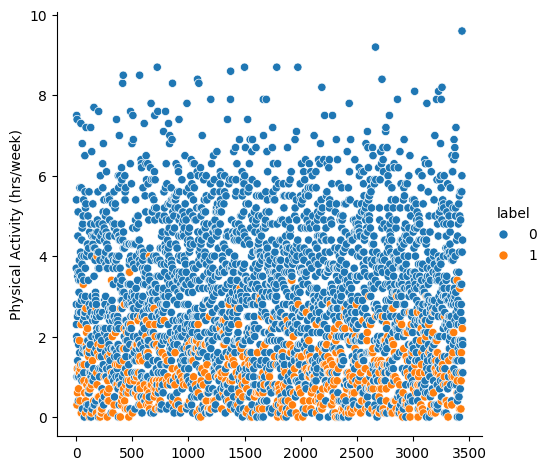

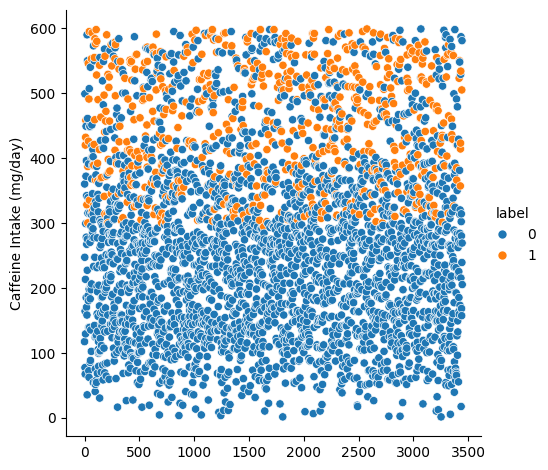

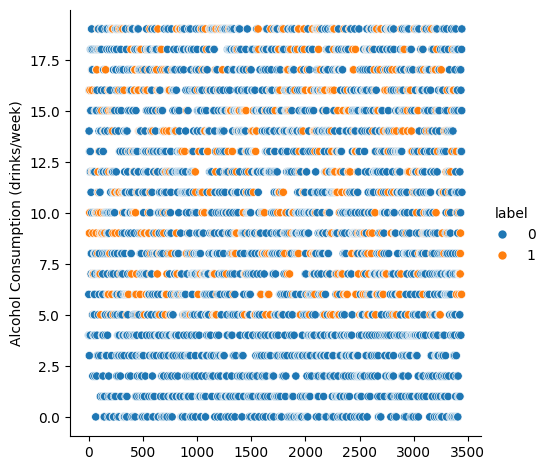

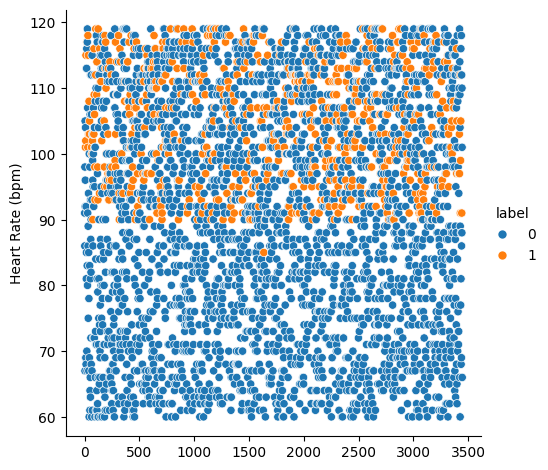

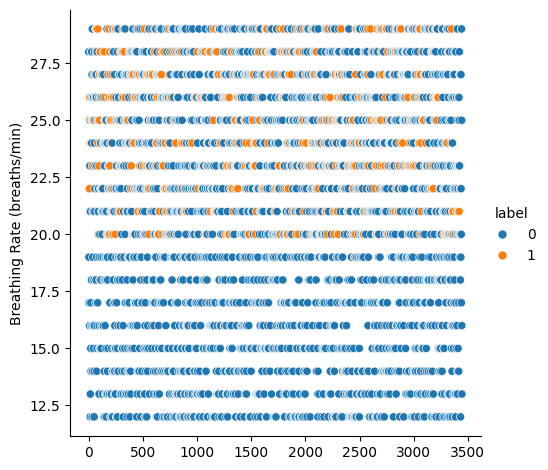

In [65]:
import seaborn as sns

for feature in not_specified_range_columns:
  sns.relplot(df, y = feature, x = list(range(len(df))), hue = 'label');

Os gráficos acima demonstram uma relação evidente entre as features e as labels.

A maioria esmagadora dos casos de alta ansiedade se encontra em instâncias com:
1. Idade entre 20 e 50 anos
2. Duração de sono menor que 6 horas
3. 2 ou menos horas de atividade física por semana
4. Consumo de cafeína por dia superior a 300 mg
5. Consumo de álcool superior a 5 drinks por semana
6. Frequência cardíaca superior a 90 bpm
7. Frequência respiratória superior a 20 respirações/min

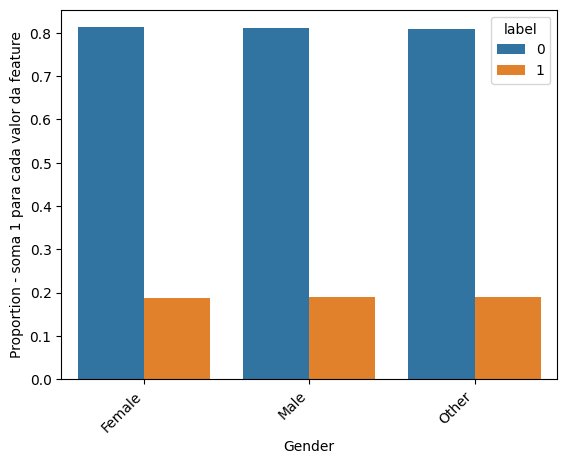

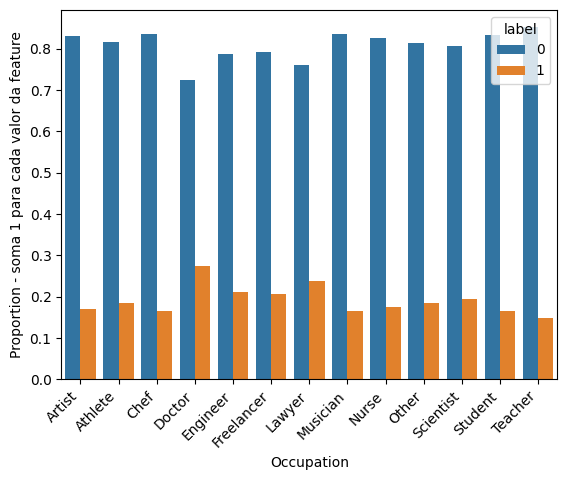

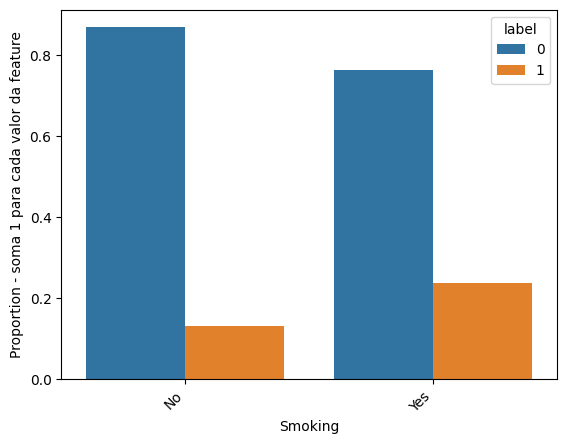

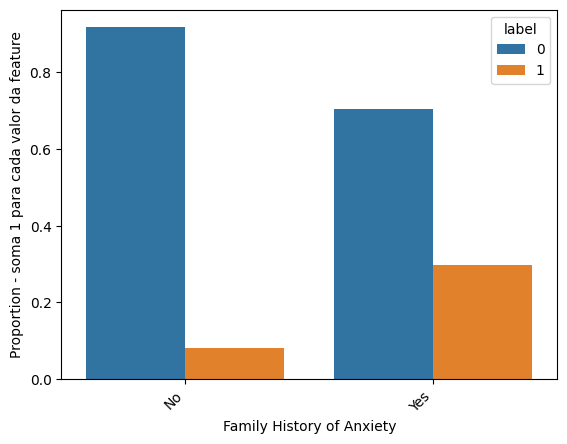

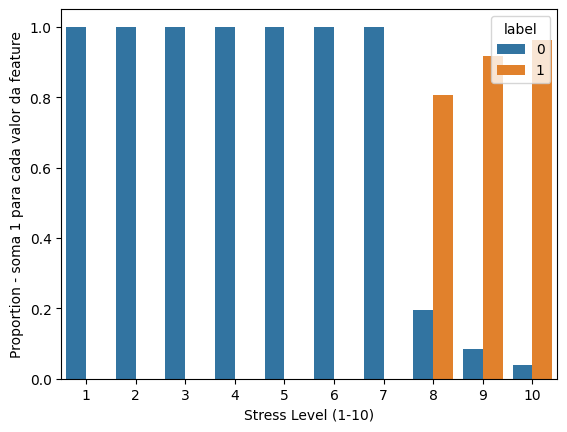

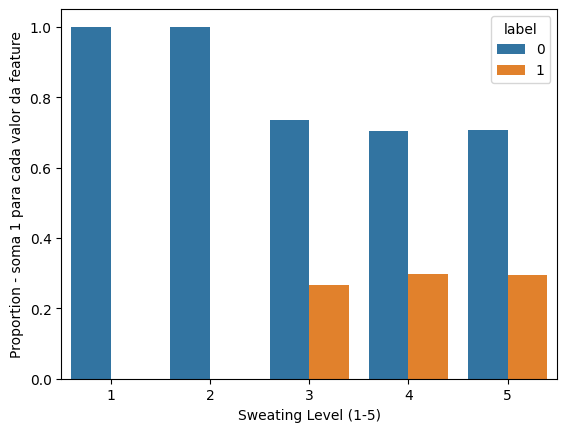

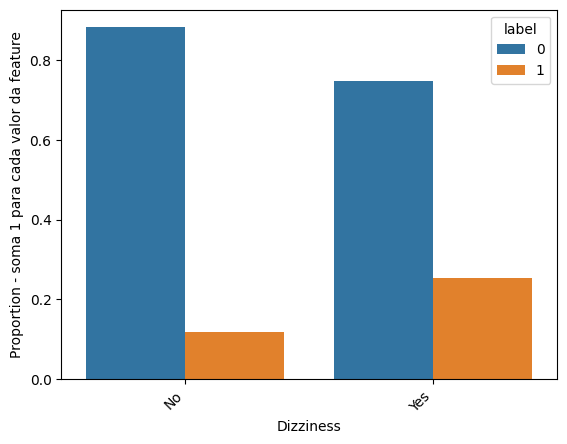

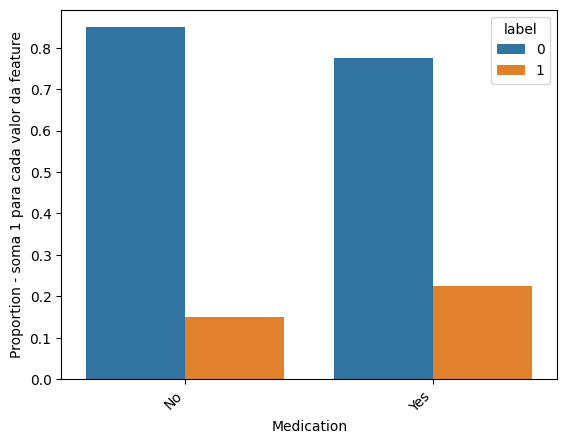

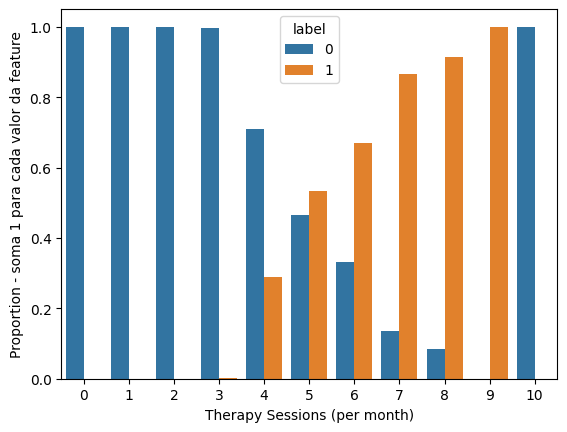

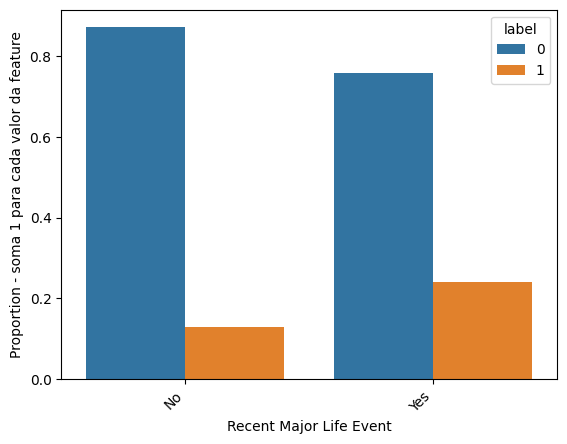

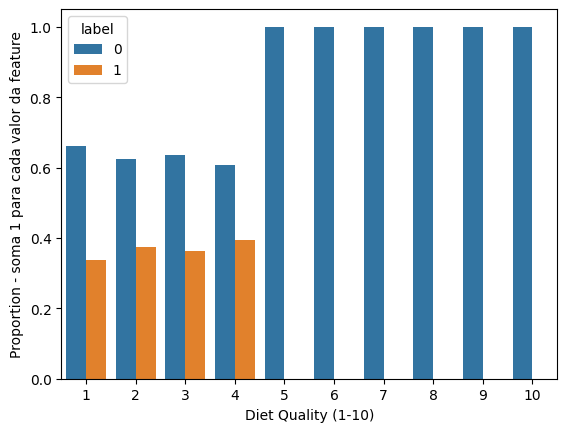

In [66]:
import matplotlib.pyplot as plt

for col in df.columns:
    if col not in not_specified_range_columns + ['label']:
        counts = (
            df
            .groupby([col, 'label'])
            .size()
            .reset_index(name='count')
        )

        counts['prob'] = (
            counts['count']
            / counts.groupby(col)['count'].transform('sum')
        )

        counts.groupby(col)['prob'].sum()

        sns.barplot(
            data=counts,
            x=col,
            y='prob',
            hue='label'
        )
        
        if df[col].dtype in ['object', 'str']:
            plt.xticks(rotation=45, ha='right')
        plt.ylabel('Proportion - soma 1 para cada valor da feature')
        plt.show()

Diferente dos gráficos anteriores, a plotagem acima mostra algumas features com baixa ou nenhuma relevância (ou seja, as proporções de ansiedade/não ansiedade para valores diferentes da feature são praticamente idênticas), como: gênero e profissão/ocupação.

Dúvidas

1. Faz sentido desconsiderar features com base nesses plots?
2. Faz sentido agrupos features (ex.: em vez de dieta variar de 1 a 10, variar de 0 a 2)